In [49]:
%pip install numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Hàm tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [50]:
# Bước 1: Nhập dữ liệu
data = pd.read_csv('DataFred.csv')
print(data.columns)  # Kiểm tra tên các cột trong DataFrame

# Giả sử các cột có tên 'Year' và 'Month'
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))
data.set_index('Date', inplace=True)
series = data['Value']

print(data.head(10))

Index(['Value', 'Month', 'Year'], dtype='object')
               Value  Month  Year
Date                             
1980-01-01  1.081214      1  1980
1980-02-01  1.352184      2  1980
1980-03-01  1.266097      3  1980
1980-04-01  1.351014      4  1980
1980-05-01  1.665023      5  1980
1980-06-01  1.827079      6  1980
1980-07-01  1.331943      7  1980
1980-08-01  1.375585      8  1980
1980-09-01  1.608728      9  1980
1980-10-01  1.861277     10  1980


In [51]:
# Bước 2: Kiểm tra tính dừng
result = adfuller(series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
# Bước 3: Biến đổi dữ liệu để đạt tính dừng (nếu cần)
series_diff = series.diff().dropna()

ADF Statistic: -4.8844238068071935
p-value: 3.739254186482478e-05


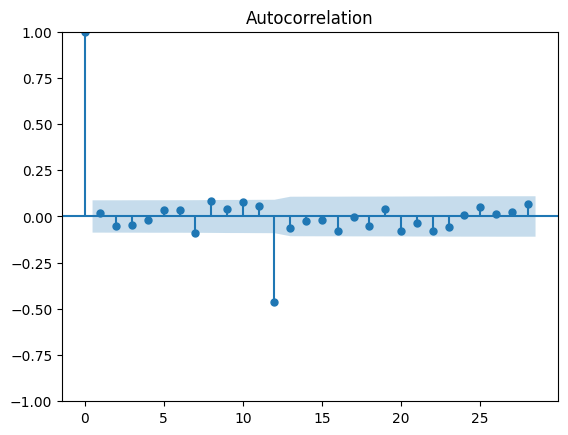

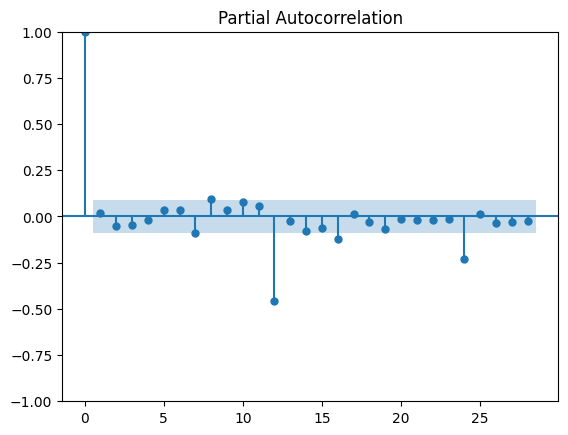

In [52]:
# Bước 4: Xác định các tham số p, d, q
plot_acf(series_diff)
plot_pacf(series_diff)
plt.show()

In [53]:
# Bước 5: Xây dựng và huấn luyện mô hình ARIMA
p, d, q = 1, 1, 1  # Thay đổi theo đồ thị ACF, PACF
model = ARIMA(series, order=(p, d, q))
model_fit = model.fit()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [54]:
# Bước 6: Dự báo và đánh giá mô hình trên tập train
train_size = int(len(series) * 0.8)
train = series[:train_size]

# Dự báo trên tập train
train_forecast = model_fit.predict(start=0, end=train_size-1, typ='levels')


In [55]:
# Đánh giá mô hình
mse_train = mean_squared_error(train, train_forecast)
mae_train = mean_absolute_error(train, train_forecast)
mape_train = mean_absolute_percentage_error(train, train_forecast)
rmse_train = np.sqrt(mse_train)

print('Mean Squared Error on Train Data:', mse_train)
print('Mean Absolute Error on Train Data:', mae_train)
print('Mean Absolute Percentage Error on Train Data:', mape_train)
print('Root Mean Squared Error on Train Data:', rmse_train)


Mean Squared Error on Train Data: 0.14794680640802138
Mean Absolute Error on Train Data: 0.3064845667549353
Mean Absolute Percentage Error on Train Data: 1.90519656731382
Root Mean Squared Error on Train Data: 0.38463853994110025


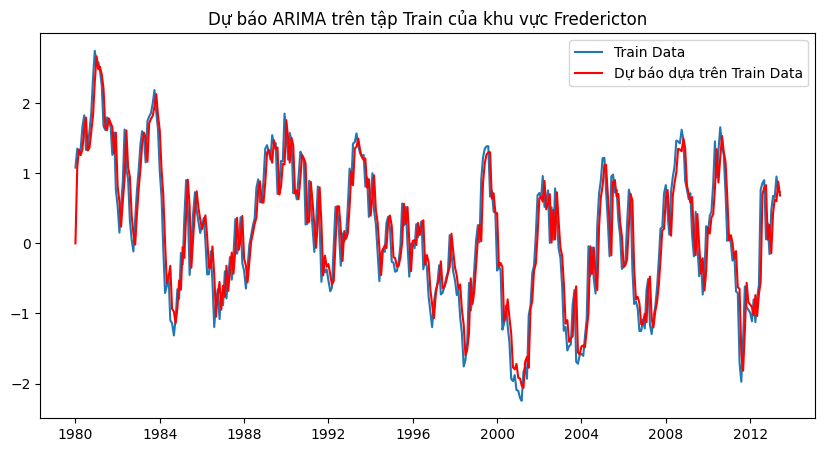

In [56]:
# Vẽ kết quả dự báo so với dữ liệu thật trên tập train
plt.figure(figsize=(10, 5))
plt.plot(train, label='Train Data')
plt.plot(train.index, train_forecast, label='Dự báo dựa trên Train Data', color='red')
plt.title('Dự báo ARIMA trên tập Train của khu vực Fredericton')
plt.legend()
plt.show()